# Simple Linear Regression

In [47]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Sample Dataset

In [4]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
import pandas as pd

Rumah = {'pajak rumah': [296.0, 242.0, 242.0, 222.0, 222.0],
        'harga' : [24, 21.6, 34.7, 33.4, 36.2]}

Rumah_df = pd.DataFrame(Rumah)
Rumah_df

,pajak rumah,harga
0,296.0,24.0
1,242.0,21.6
2,242.0,34.7
3,222.0,33.4
4,222.0,36.2


Daftar pajak rumah dan harga. Dictionary yang terdiri dari 2 buah key yaitu pajak rumah dan harga. Key berasosiasi dengan list. Membuat suatu model machine learning sederhana untuk memprediksi harga rumah bila diketahui pajak rumahnya. pajak rumah = features. Harga rumah = target.

## Visualisasi Data

Visualisasi Data menggunakan scatter plot. rumah_df.plot menggunakan 3 parameter kind = scatter, karena plotting yang ingin digunakan adalah scatter plot. x berasosiasi dengan pajak rumah y berasosiasi dengan harga plt.xlim dan plt.ylim digunakan untuk mengatur jangkauan sumbu x dan sumbu y.

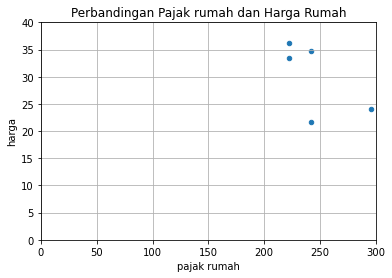

In [13]:
import matplotlib.pyplot as plt

rumah_df.plot(kind='scatter', x='pajak rumah', y='harga')

plt.title('Perbandingan Pajak rumah dan Harga Rumah')
plt.xlabel('pajak rumah')
plt.ylabel('harga')
plt.xlim(0, 300)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

Setiap data point atau markernya (titik berwarna biru) akan merepresentasikan 1 baris dari dataframe yang dimiliki. Model linear regression akan berkaitan dengan persamaan garis lurus, oleh karena itu bisa dilihat titik membentuk garis lurus ke atas.

## Penyesuaian Dataset

In [14]:
import numpy as np

X = np.array(rumah_df['pajak rumah'])
y = np.array(rumah_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [296. 242. 242. 222. 222.]
y: [24.  21.6 34.7 33.4 36.2]


Mengelompokkan features dan target kedalam dua variable terpisah dan konversi struktur data yang semula menggunakan padas data frame menjadi numpy array.

In [15]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

Diameter merupakan features maka Diseleksi dl lalu dikonversi menjadi numpy array dan ditampung ke dalam variable X dan Y.

In [48]:
X

array([[296.],
       [242.],
       [242.],
       [222.],
       [222.]])

Diatas merupakan sekumpulan nilai features dan target. Variable x hanya terdiri dari 1 dimensi sedangkan model machine learning dalam skicit-learn membutuhkan sekumpulan nilai features yang dirampung dalam suatu array 2 dimensi. Maka dilakukanlah proses reshaping terhadap array yang digunakan untuk menampung nilai features.

## Training Simple Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Melakukan proses training model machine learning. Training dilakukan dengan menggunakan methode fit(). Membutuhkan 2 parameter yaitu sekumpulan nilai features dan sekumpulan nilai target. Di tahap ini, kasus model saat ini berstatus trained model.

## Visualisasi Simple Linear Regression Model

In [34]:
X_vis = np.array([0, 300]).reshape(-1, 1)
y_vis = model.predict(X_vis)

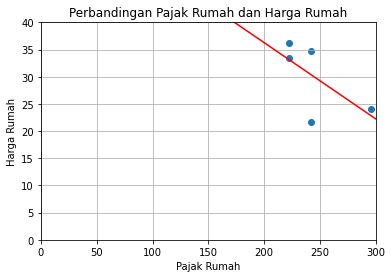

In [35]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r') 

plt.title('Perbandingan Pajak Rumah dan Harga Rumah')
plt.xlabel('Pajak Rumah')
plt.ylabel('Harga Rumah')
plt.xlim(0, 300)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

- Garis merah tersebut akan memiliki formula persamaan seperti di bawah ini:
   -  **Intercept** merupakan titik pada sumbu y dimana garis linear yang tebentuk menabrak suatu titik di sumbu y ketika sumbu x bernilai 0.
   - **Slope** akan berpengaruh pada tingkat kemiringan dari garis linear yang terbentuk dan akan menghasilkan garis horizontal.

In [21]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 64.31644908616188
slope: [-0.14026327]


Untuk menampilkan nilai intercept bisa dengan memanggil model objek lalu panggil .intercept_ Untuk menampilkan nilai slope bisa dengan memanggil model objek lalu panggil .coef_

## Mencari nilai slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\beta = \frac{cov(x, y)}{var(x)}$

In [22]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[296.]
 [242.]
 [242.]
 [222.]
 [222.]]

X flatten: [296. 242. 242. 222. 222.]

y: [24.  21.6 34.7 33.4 36.2]


untuk proses kalkulasi cov dan var, x di flatten terlebih dahulu/dikembalikan ke bentuk semula menggunakan method flatten.

### Variance

In [23]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 919.2


Untuk menghitung nilai variance maka panggil np.var lalu dibutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten dan parameter kedua yaitu ddof yaitu dd of freedom (lihat di pelajaran statistika) di set sebagai 1

### Covariance

In [24]:
np.cov(X.flatten(), y)

array([[ 919.2  , -128.93 ],
       [-128.93 ,   44.662]])

Untuk menghitung nilai covariance maka dipanggil np.cov lalu dibutuhkan 2 parameter. Parameter pertama yaitu nilai x yang sudah di flatten dan parameter kedua nilai dari variable y. Akan menghasilkan covariance matrix dan terdiri dari 2 kolom dan 2 baris.

In [26]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: -128.93


### Slope

In [28]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: -0.140263272410792


Setelah menemukan nilai variance dan covariance, dapat digunakanlah nilai slope dengan formula seperti diatas.

## Mencari nilai intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\alpha = \bar{y} - \beta \bar{x}$

In [29]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept: {intercept}')

intercept: 64.3164490861619


Nilai intercept diperoleh dengan menselisihkan nilai rata-rata dari y/target terhadap hasil perkalian antara slope dan nilai rata-rata dari x.

## Prediksi

In [50]:
pajak_rumah = np.array([100, 150, 300]).reshape(-1, 1)
pajak_rumah

array([[100],
       [150],
       [300]])

In [49]:
prediksi_harga = model.predict(pajak_rumah)
prediksi_harga

array([50.29012185, 43.27695822, 22.23746736])

Berdasarkan ukuran diameternya berdasarkan 3 nilai diameter. Yaitu 100, 150 dan 300 sebagai features yang akan diprediksi. Lalu 3 nilai tsb dibundle menjadi np array.

In [51]:
for prm, hrg in zip(pajak_rumah, prediksi_harga):
    print(f'pajak rumah: {prm} prediksi harga: {hrg}')

pajak rumah: [100] prediksi harga: 50.29012184508268
pajak rumah: [150] prediksi harga: 43.27695822454308
pajak rumah: [300] prediksi harga: 22.237467362924285


## Evaluasi Simple Linear Regression Model

### Training & Testing Dataset

In [39]:
X_train = np.array([296.0, 242.0, 242.0, 222.0, 222.0]).reshape(-1, 1)
y_train = np.array([24, 21.6, 34.7, 33.4, 36.2])

X_test = np.array([296.0, 242.0, 242.0, 222.0, 222.0]).reshape(-1, 1)
y_test = np.array([22.79852045, 30.37273716, 30.37273716, 33.17800261, 33.17800261])

### Training Simple Linear Regression Model

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Dibentuk kembali objek model untuk ditraining dengan menggunakan linearregression. Ditampung ke dalam variable model. Dan menggunakan method fit dan menyertakan x_train dan y_train sebagai parameternya.

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

In [43]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 1.0


Import matrix evaluasi dengan memanggil sklearn.metrics lalu import r2_score. Lalu melakukan prediksi nilai target Dengan memanfaatkan nilai features pada testing set. Disini terdapat nilai y real (y_test) dan y hasil prediksi untuk membandingkan. R-squared semakin mendekati 1 maka semakin baik dan semakin mendekati 0 maka semakin buruk pula.

## Mencari nilai R-squared ($R^2$)

$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$

$SS_{res} =  \sum_{i=1}^{n}(y_i - f(x_i))^2$

$SS_{tot} =  \sum_{i=1}^{n}(y_i - \bar{y})^2$

$SS_{res}$

In [44]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 2.3585800810470193e-17


Ssres merepresentasikan sum squares residual.

Ssres merupakan proses perhitungan selisih antara setiap nilai y pada testing set dengan nilai prediksinya. Lalu nilai selisih ini dipangkatkan 2 dan dijumlahkan secara keseluruhan. (menghitung nilai error).

$SS_{tot}$

In [45]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 72.33657486789154


Sstot merepresentasikan sum squares total.

Sstot merupakan proses perhitungan selisih nilai untuk setiap nilai y pada testing set dengan nilai rata-ratanya. Lalu nilai selisih ini dipangkatkan 2 lalu diakumulasikan dengan seluruh nilai y yang ada.

In [46]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 1.0


Setelah menemukan nilai ss res dan ss tot, dapat ditemukanlah nilai r2